C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Predicted Profit Values')

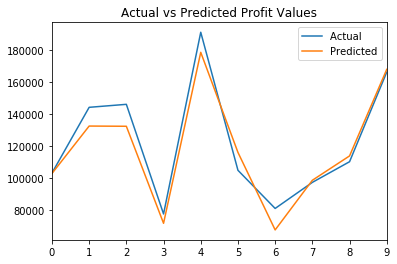

In [49]:
#Made with ♥ by ishandeveloper 

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


dataset=pd.read_csv('companies.csv')

# Profit=dataset.iloc[:,-1].values.reshape(-1,1)
# RSpend=dataset.iloc[:,0].values.reshape(-1,1)
# ASpend=dataset.iloc[:,1].values.reshape(-1,1)
# BSpend=dataset.iloc[:,2].values.reshape(-1,1)
# State=dataset.iloc[:,3].values.reshape(-1,1)

X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values

labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])

transformer=ColumnTransformer(
    transformers=[
        (
            "State",
            OneHotEncoder(),
            [3]
        )
    ],remainder='passthrough'
)

X=transformer.fit_transform(X)

X=X[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# print(y_pred)
# print(y_test)

a=pd.DataFrame(({'Actual ':y_test,'Predicted':y_pred}))
a.plot()
plt.title('Actual vs Predicted Profit Values')